# 시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회
<hr>

## 1. 라이브러리 & 데이터

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
train_err=pd.read_csv('./data/train_err_data.csv')
train_pro=pd.read_csv('./data/train_problem_data.csv')
train_qual=pd.read_csv('./data/train_quality_data.csv')

test_err=pd.read_csv('./data/test_err_data.csv')
test_qual=pd.read_csv('./data/test_quality_data.csv')
submission=pd.read_csv('./data/sample_submission.csv')

C:\Users\Minyoung Kim\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Minyoung Kim\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<br>

## train_err(시스템에 발생한 에러 로그)

In [12]:
train_err

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,15,1
16554659,24999,20201130172625,model_3,05.15.2138,16,1
16554660,24999,20201130172625,model_3,05.15.2138,4,0
16554661,24999,20201130172631,model_3,05.15.2138,4,0


In [64]:
print(train_err['user_id'].agg(['max','min']))
print(len(train_err['user_id'].unique()))

max    24999
min    10000
Name: user_id, dtype: int64
15000


In [42]:
train_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   user_id   int64         
 1   time      datetime64[ns]
 2   model_nm  object        
 3   fwver     object        
 4   errtype   int64         
 5   errcode   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 757.8+ MB


- user_id : 사용자 ID
- time : 로그발생시간
- model_nm : 모델명
- fwver : 펌웨어 버전
- errtype : 에러타입
- errcode : 에러코드

In [ ]:
list(test_err['errcode'].unique())

In [83]:
train_err['errtype'].value_counts()

23    2276515
31    1985294
22    1865361
15    1604951
4     1296750
16    1249376
32    1130564
5      952920
40     730378
28     544306
27     540804
26     536401
12     320181
11     307030
14     252015
33     178477
34     165536
10     133403
41     104138
7       51993
6       50482
17      46009
24      39071
42      34374
3       30758
2       26106
13      22843
1       21545
39      15820
35      10187
37       9336
36       9317
38       4539
18       2671
20       2080
25       1184
19        664
21        607
30        402
8         166
9         109
Name: errtype, dtype: int64

In [85]:
train_err[['time','errtype']].groupby(['errtype','time']).count()

KeyboardInterrupt: 

In [10]:
test_err['errtype'].unique()

array([31, 33, 15, 22, 11, 12, 23, 26, 16, 17,  5, 39, 24, 40, 36, 37, 32,
       42, 14, 18, 25, 20, 35,  6,  7,  4,  3, 13, 27, 28, 41, 34, 38,  1,
        8, 21, 19,  2, 10, 30,  9], dtype=int64)

- 1~42까지 29를 제외하고 총 **41가지 에러타입**

In [9]:
test_err['model_nm'].unique()

array(['model_1', 'model_2', 'model_3', 'model_0', 'model_4', 'model_5',
       'model_6', 'model_7', 'model_8'], dtype=object)

- 0~8까지 총 **9가지 모델**

<br>

## train_pro(사용자 불만 및 불만이 발생한 시간)

In [14]:
train_pro

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000
...,...,...
5424,20167,20201125120000
5425,16270,20201110120000
5426,19114,20201106230000
5427,21505,20201104110000


In [15]:
train_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  5429 non-null   int64
 1   time     5429 non-null   int64
dtypes: int64(2)
memory usage: 85.0 KB


- user_id : 사용자 ID
- time : 불만접수시간

<br>

## train_qual(시스템 퀄리티 로그)

In [16]:
train_qual

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828619,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,1,0,0,0,0,17,0,0
828620,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828621,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,3,0,0,0,0,17,0,0
828622,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0


In [17]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


- time : 로그발생시간
- user_id : 사용자 ID
- fwver : 펌웨어 버전
- quality_N : 퀄리티_N

In [23]:
train_qual.isna().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

- 펌웨어 버전과 퀄리티_0,2,5만 nan값 존재

In [65]:
print(train_qual['user_id'].agg(['max','min']))
print(len(train_qual['user_id'].unique()))

max    24997
min    10000
Name: user_id, dtype: int64
8281


In [69]:
train_qual.describe()

,time,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_6,quality_11,quality_12
count,8.286240e+05,828624.000000,684192.000000,828624.000000,788511.000000,828624.0,828624.0,828624.000000,828624.000000,828624.000000
mean,2.020112e+13,17574.678315,4.148701,-0.171782,4.751094,0.0,0.0,2.043391,-0.181638,0.045878
std,8.863638e+06,4374.113554,479.315029,0.692386,586.252469,0.0,0.0,32.695380,0.397767,0.302452
min,2.020103e+13,10000.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000
25%,2.020111e+13,13685.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,2.020112e+13,17597.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,2.020112e+13,21423.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
max,2.020113e+13,24997.000000,157667.000000,171.000000,191859.000000,0.0,0.0,600.000000,14.000000,14.000000


In [75]:
# train_qual['quality_11'].value_counts()

In [19]:
train_qual['fwver'].unique()

array(['05.15.2138', '04.22.1750', '04.16.3553', '04.33.1261',
       '04.22.1778', '04.33.1185', '04.16.3571', '05.66.3571',
       '03.11.1149', '03.11.1167', '04.82.1684', '04.82.1778',
       '04.33.1149', nan, '05.66.3237', '04.73.2237', '09.17.1431',
       '04.22.1684', '05.15.2120', '04.33.1125', '05.15.2122',
       '04.22.1666', '04.22.1656', '04.16.3439', '04.73.2571',
       '05.15.2114', '04.16.3345', '04.22.1442'], dtype=object)

- nan포함 **28가지 펌웨어 버전**

In [28]:
train_qual.groupby(['user_id','time','fwver']).count().head(10)

quality_0  quality_1  quality_2  quality_3  \
user_id time           fwver                                                    
10000   20201129090000 05.15.2138         12         12         12         12   
        20201130210000 05.15.2138         12         12         12         12   
10002   20201104110000 05.15.2138         12         12         12         12   
        20201106010000 05.15.2138         12         12         12         12   
        20201111010000 05.15.2138         12         12         12         12   
        20201115130000 05.15.2138         12         12         12         12   
        20201118001000 05.15.2138         12         12         12         12   
        20201119141000 05.15.2138         12         12         12         12   
        20201130010000 05.15.2138         12         12         12         12   
        20201130030000 05.15.2138         12         12         12         12   

                                   quality_4  quality_5  quality_6  quality_7  \
user_id time           fwver                                                    
10000   20201129090000 05.15.2138         12         12         12         12   
        20201130210000 05.15.2138         12         12         12         12   
10002   20201104110000 05.15.2138         12         12         12         12   
        20201106010000 05.15.2138         12         12         12         12   
        20201111010000 05.15.2138         12         12         12         12   
        20201115130000 05.15.2138         12         12         12         12   
        20201118001000 05.15.2138         12         12         12         12   
        20201119141000 05.15.2138         12         12         12         12   
        20201130010000 05.15.2138         12         12         12         12   
        20201130030000 05.15.2138         12         12         12         12   

                                   quality_8  quality_9  quality_10  \
user_id time           fwver                                          
10000   20201129090000 05.15.2138         12         12          12   
        20201130210000 05.15.2138         12         12          12   
10002   20201104110000 05.15.2138         12         12          12   
        20201106010000 05.15.2138         12         12          12   
        20201111010000 05.15.2138         12         12          12   
        20201115130000 05.15.2138         12         12          12   
        20201118001000 05.15.2138         12         12          12   
        20201119141000 05.15.2138         12         12          12   
        20201130010000 05.15.2138         12         12          12   
        20201130030000 05.15.2138         12         12          12   

                                   quality_11  quality_12  
user_id time           fwver                               
10000   20201129090000 05.15.2138          12          12  
        20201130210000 05.15.2138          12          12  
10002   20201104110000 05.15.2138          12          12  
        20201106010000 05.15.2138          12          12  
        20201111010000 05.15.2138          12          12  
        20201115130000 05.15.2138          12          12  
        20201118001000 05.15.2138          12          12  
        20201119141000 05.15.2138          12          12  
        20201130010000 05.15.2138          12          12  
        20201130030000 05.15.2138          12          12

In [21]:
train_qual.groupby(['user_id','time','fwver']).count()['quality_2'].value_counts()

12    65645
24       32
2         1
1         1
0         1
Name: quality_2, dtype: int64

- 같은 사용자가 같은 시간에 사용한 퀄리티 로그가 대부분 12개씩 측정된 것을 알 수 있음

In [ ]:
datetime.strptime?

<br>

## 2. 전처리

In [5]:
# # time컬럼 datetime으로 변경
# train_err['time']=[datetime.datetime.strptime(str(i),'%Y%m%d%H%M%S') for i in train_err['time']]
# train_pro['time']=[datetime.datetime.strptime(str(i),'%Y%m%d%H%M%S') for i in train_pro['time']]
# train_qual['time']=[datetime.datetime.strptime(str(i),'%Y%m%d%H%M%S') for i in train_qual['time']]

In [3]:
# time컬럼 datetime으로 변경
train_err['time']=pd.to_datetime(train_err['time'], format='%Y%m%d%H%M%S')
train_pro['time']=pd.to_datetime(train_pro['time'], format='%Y%m%d%H%M%S')
train_qual['time']=pd.to_datetime(train_qual['time'], format='%Y%m%d%H%M%S')
test_err['time']=pd.to_datetime(test_err['time'], format='%Y%m%d%H%M%S')
test_qual['time']=pd.to_datetime(test_qual['time'], format='%Y%m%d%H%M%S')

In [8]:
# a,b=train_err['user_id'][0],train_err['fwver'][0]
# for i in range(len(train_err))
#     if train_err['user_id'][i] != train_qual['user_id'][i] or train_err['fwver'][i] != train_qual['fwver'][i]:
#         tmp=train_qual[(train_qual['user_id']==user_id)&(train_qual['fwver']==fwver)]
#         tmp

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
16554658,24999,2020-11-30 16:30:51,model_3,05.15.2138,15,1
16554659,24999,2020-11-30 17:26:25,model_3,05.15.2138,16,1
16554660,24999,2020-11-30 17:26:25,model_3,05.15.2138,4,0
16554661,24999,2020-11-30 17:26:31,model_3,05.15.2138,4,0


In [14]:
col_list=['fwver','quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12']
train_qual[col_list].groupby(['fwver']).mean()

,quality_0,quality_1,quality_2,quality_3,quality_4,quality_6,quality_11,quality_12
fwver,,,,,,,,
03.11.1149,NaN,-0.009804,0.068627,0.0,0.0,-0.009804,-0.009804,0.000000
03.11.1167,NaN,-0.108951,8.602863,0.0,0.0,0.828120,-0.106675,0.282521
04.16.3345,0.000000,0.000000,0.000000,0.0,0.0,59.833333,0.000000,0.000000
04.16.3439,0.000000,0.083333,0.000000,0.0,0.0,0.416667,0.000000,0.000000
04.16.3553,-0.172872,-0.157845,-0.064637,0.0,0.0,3.354995,-0.172703,0.001929
04.16.3571,-0.165771,-0.152330,-0.165771,0.0,0.0,0.068100,-0.165771,0.000000
04.22.1442,-0.166667,-0.166667,-0.166667,0.0,0.0,-0.166667,-0.166667,0.000000
04.22.1656,0.000000,0.000000,0.000000,0.0,0.0,8.083333,0.000000,0.000000
04.22.1666,-0.003145,-0.001572,-0.003145,0.0,0.0,-0.003145,-0.003145,0.000000


In [65]:
train_problem[train_problem['user_id']==10004]

,user_id,time
492,10004,20201104120000


In [50]:
train_err

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,15,1
16554659,24999,20201130172625,model_3,05.15.2138,16,1
16554660,24999,20201130172625,model_3,05.15.2138,4,0
16554661,24999,20201130172631,model_3,05.15.2138,4,0


<br>

# EDA

## error_data

In [5]:
print(train_err['time'].agg(['min','max']) )

print(test_err['time'].agg(['min','max']) )

min   2020-10-31 23:59:59
max   2020-12-02 18:51:52
Name: time, dtype: datetime64[ns]
min   2020-10-31 23:59:59
max   2020-12-14 12:01:18
Name: time, dtype: datetime64[ns]


In [89]:
tmp=train_err['time'].value_counts()[train_err['time'].value_counts()>=100].index
tmp=tmp.map(lambda x: x.floor('H'))
test=train_qual[train_qual['time'].isin(tmp)]
tmp

DatetimeIndex(['2020-11-08 02:00:00', '2020-11-08 02:00:00',
               '2020-11-08 02:00:00', '2020-11-08 02:00:00',
               '2020-11-08 02:00:00', '2020-11-08 02:00:00',
               '2020-11-07 23:00:00', '2020-11-08 02:00:00',
               '2020-11-08 02:00:00', '2020-11-08 02:00:00',
               '2020-11-08 02:00:00', '2020-11-08 02:00:00',
               '2020-11-08 02:00:00', '2020-11-08 02:00:00',
               '2020-11-08 02:00:00', '2020-11-07 23:00:00',
               '2020-11-07 23:00:00', '2020-11-04 14:00:00',
               '2020-11-08 02:00:00', '2020-11-03 10:00:00',
               '2020-11-03 10:00:00', '2020-11-07 23:00:00',
               '2020-11-08 02:00:00', '2020-11-08 02:00:00',
               '2020-11-08 02:00:00', '2020-11-09 22:00:00',
               '2020-11-26 08:00:00', '2020-11-04 13:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
train_qual['quality_9'].str.replace(',','')

In [91]:
test=train_qual[train_qual['time'].isin(tmp)]

In [92]:
test.describe()

,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_6,quality_11,quality_12
count,1332.000000,1152.000000,1332.000000,1284.000000,1332.0,1332.0,1332.000000,1332.000000,1332.000000
mean,17801.477477,0.157118,-0.167417,0.133178,0.0,0.0,0.897898,-0.165165,0.036036
std,4286.267604,2.419254,0.375495,2.289668,0.0,0.0,23.389013,0.381448,0.266133
min,10072.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000
25%,14244.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,18083.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,21398.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
max,24867.000000,52.000000,1.000000,52.000000,0.0,0.0,600.000000,2.000000,2.000000


In [ ]:
train_err['time'].value_counts()>=100

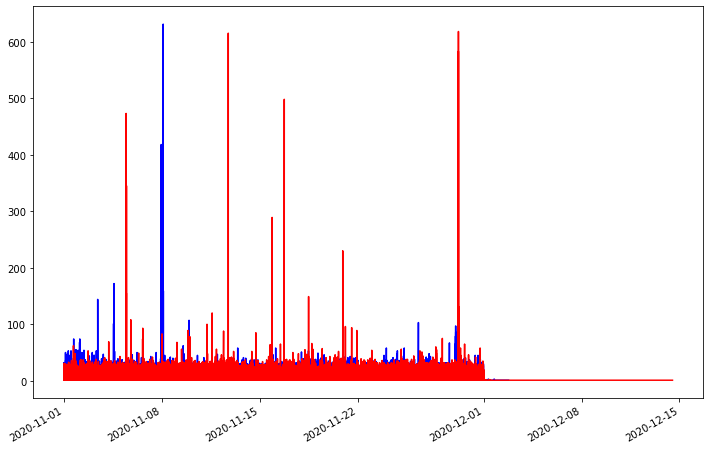

In [4]:
# train_err의 'time' value 빈도
plt.figure(figsize = (12,8))
time_train=train_err['time'].value_counts().sort_index()
time_test=test_err['time'].value_counts().sort_index()
time_train.plot(color='b')
time_test.plot(color='r')
plt.show() 

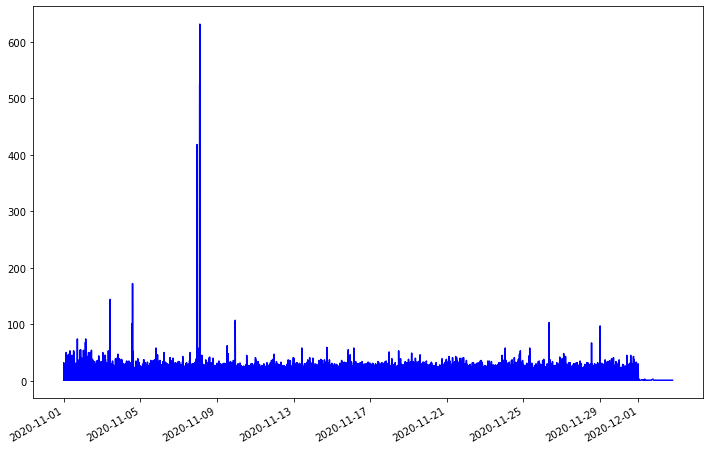

In [6]:
# train_err의 'time' value 빈도
plt.figure(figsize = (12,8))
time_train=train_err['time'].value_counts().sort_index()
time_train.plot(color='b')
plt.show() 

### model_mn

C:\Users\Minyoung Kim\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Minyoung Kim\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

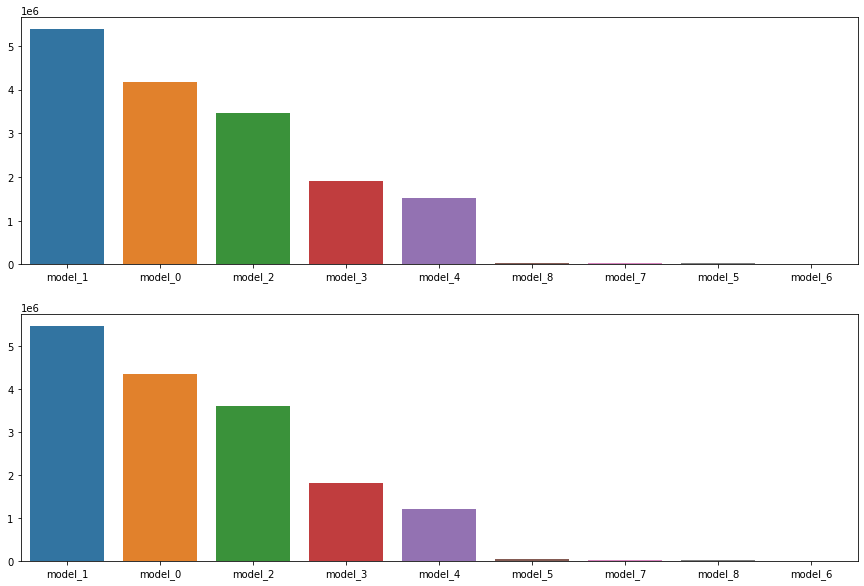

In [55]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
model_train=train_err['model_nm'].value_counts()
sns.barplot(model_train.index,model_tdrain.values)

plt.subplot(2,1,2)
model_test=test_err['model_nm'].value_counts()
sns.barplot(model_test.index,model_test.values)

In [14]:
# model_nm
train_errtype = list(train_err['model_nm'].unique())
test_errtype  = list(test_err['model_nm'].unique())
print(len(train_errtype))
print(len(test_errtype))

9
9


### fwver

<AxesSubplot:>

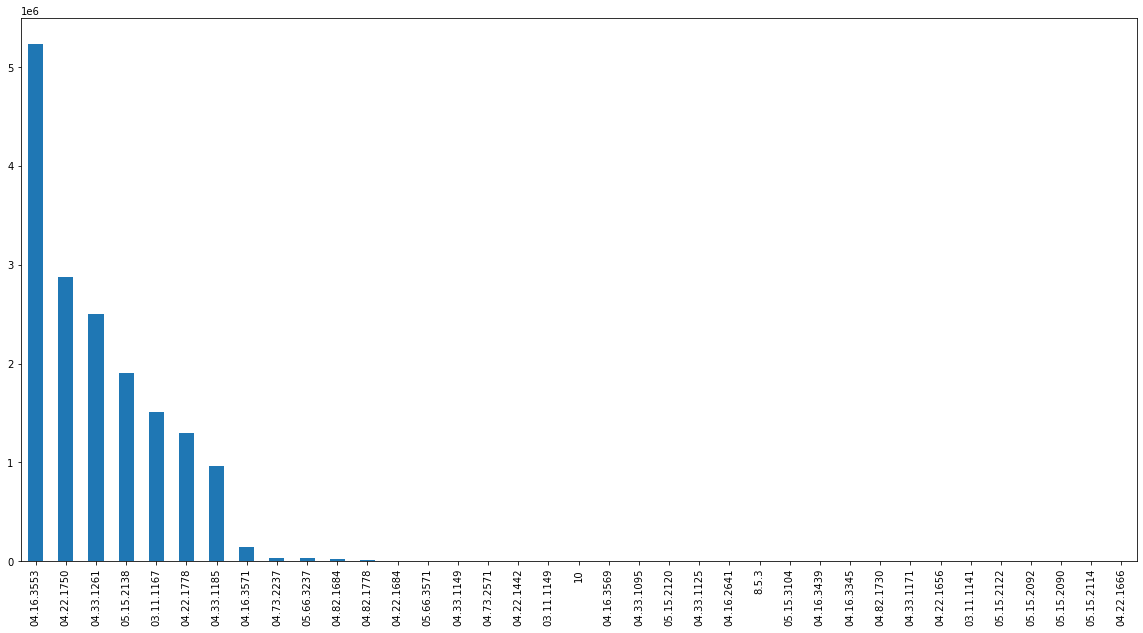

In [53]:
fig = plt.figure(figsize=(20,10))
fwver=train_err['fwver'].value_counts()
fwver.plot(kind='bar')

In [15]:
# fwver
train_fwver = list(train_err['fwver'].unique())
test_fwver  = list(test_err['fwver'].unique())
print(len(train_fwver))
print(len(test_fwver))

37
40


### 에러코드 처리

<AxesSubplot:>

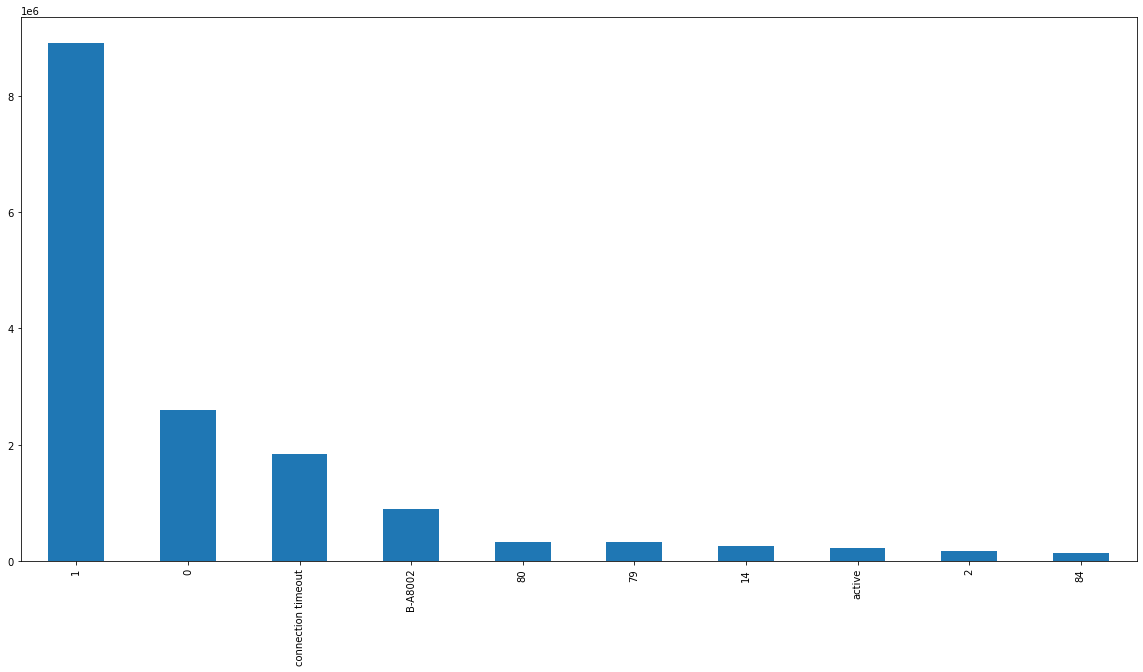

In [37]:
fig = plt.figure(figsize=(20,10))
err=train_err['errcode'].value_counts()[:10]
err.plot(kind='bar')


In [3]:
# err=train_err['errcode'].value_counts()

In [47]:
for x in err.index:
    print("{0} : {1:.2f}%".format(x,(train_err['errcode']==x).sum()/len(train_err)*100))


1 : 53.80%
0 : 15.70%
connection timeout : 11.09%
B-A8002 : 5.42%
80 : 2.02%
79 : 2.01%
14 : 1.59%
active : 1.32%
2 : 1.01%
84 : 0.78%
85 : 0.77%
standby : 0.67%
NFANDROID2 : 0.63%
connection fail to establish : 0.61%
3 : 0.55%
90 : 0.40%
89 : 0.39%
S-61001 : 0.21%
95 : 0.14%
94 : 0.13%
4 : 0.12%
13 : 0.07%
Q-64002 : 0.07%
8.0 : 0.06%
6 : 0.04%
5 : 0.04%
78 : 0.03%
81 : 0.03%
86 : 0.02%
connectionterminated by local host : 0.02%
UNKNOWN : 0.02%
100 : 0.02%
terminate by peer user : 0.02%
99 : 0.01%
83 : 0.01%
V-21008 : 0.01%


KeyboardInterrupt: 

In [11]:
err_list=err.index[:9]
err_code=train_err['errcode'].values

train_err.loc[idx,'errcode']='others'


train_err['errcode'].unique()

array(['1', '0', '2', 'others', 'B-A8002', '14', 'active',
       'connection timeout', '80', '79'], dtype=object)

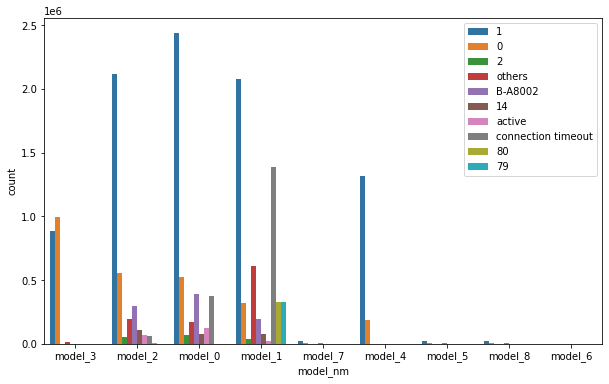

In [13]:
# 모델별 에러코드 빈도
plt.figure(figsize = (10,6))
sns.countplot(data = train_err, x = 'model_nm', hue = train_err['errcode'])
plt.legend(loc='upper right')

- model_3을 제외한 나머지는 errcode 1 의 빈도가 가장 많은것으로 보임
- model_1은 connection timeout 에러가 비교적 많음

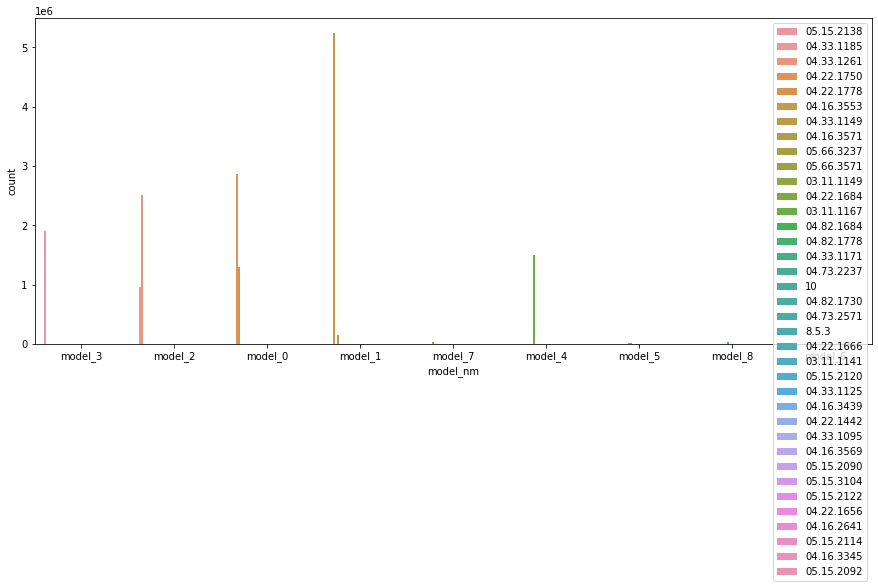

In [94]:
plt.figure(figsize = (15,6))
sns.countplot(data = train_err, x = 'model_nm', hue = train_err['fwver'])
plt.legend(loc='upper right')

### errcode

In [16]:
# errcode
train_errcode = list(train_err['errcode'].unique())
test_errcode  = list(test_err['errcode'].unique())
print(len(train_errcode))
print(len(test_errcode))

2806
2956


## Quality_data

In [24]:
train_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        828624 non-null  datetime64[ns]
 1   user_id     828624 non-null  int64         
 2   fwver       788544 non-null  object        
 3   quality_0   684192 non-null  float64       
 4   quality_1   828624 non-null  int64         
 5   quality_2   788511 non-null  float64       
 6   quality_3   828624 non-null  int64         
 7   quality_4   828624 non-null  int64         
 8   quality_5   828604 non-null  object        
 9   quality_6   828624 non-null  int64         
 10  quality_7   828624 non-null  object        
 11  quality_8   828624 non-null  object        
 12  quality_9   828624 non-null  object        
 13  quality_10  828624 non-null  object        
 14  quality_11  828624 non-null  int64         
 15  quality_12  828624 non-null  int64         
dtypes:

In [26]:
print(train_qual.isna().sum())
print('-----------------------------')
print(test_qual.isna().sum())

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64
-----------------------------
time               0
user_id            0
fwver          22764
quality_0     106584
quality_1         11
quality_2      21115
quality_3          0
quality_4          0
quality_5         44
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64


<AxesSubplot:>

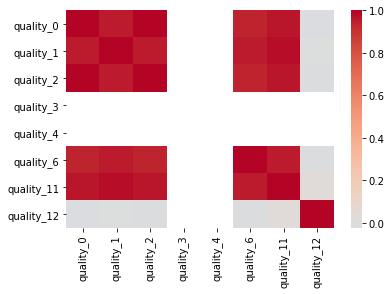

In [22]:
quality=['quality_0','quality_1','quality_2','quality_3','quality_4','quality_5','quality_6','quality_7','quality_8','quality_9','quality_10','quality_11','quality_12']


correlations = train_qual[quality].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", center=0)

In [57]:
train_qual['quality_0'].value_counts()

 0.0       542790
-1.0       130828
 1.0         2097
 2.0         1252
 3.0          518
            ...  
 957.0          1
 3835.0         1
 959.0          1
 3837.0         1
 2039.0         1
Name: quality_0, Length: 753, dtype: int64

In [58]:
train_qual['quality_1'].value_counts()

 0      670270
-1      153649
 1        2567
 2        1140
 3         391
 4         202
 5         134
 6          71
 7          50
 8          35
 9          26
 10         24
 11         12
 12          7
 13          6
 14          5
 170         4
 18          4
 20          4
 21          4
 16          3
 17          3
 15          3
 169         2
 23          2
 171         1
 19          1
 35          1
 40          1
 88          1
 117         1
Name: quality_1, dtype: int64

In [ ]:
train_qual['quality_2'].value_counts()

In [ ]:
train_qual['quality_1'].value_counts()

In [ ]:
train_qual['quality_1'].value_counts()

## Problem_data

In [30]:
train_pro.isna().sum()

user_id    0
time       0
dtype: int64

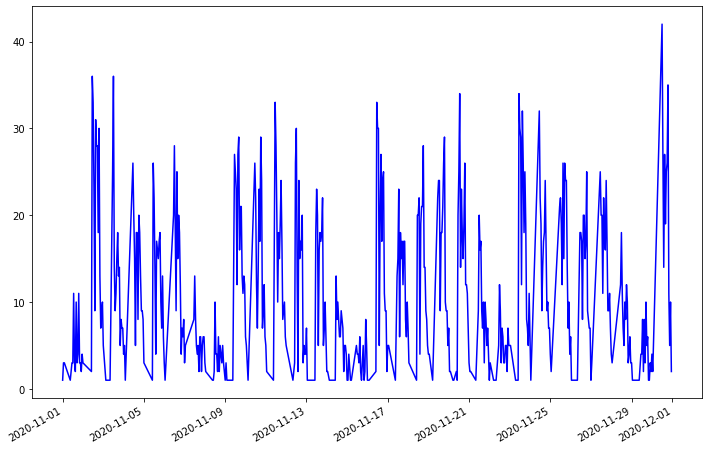

In [31]:
plt.figure(figsize = (12,8))
time=train_pro['time'].value_counts().sort_index()
time.plot(color='b')
plt.show() 